In [32]:
import pandas as pd
import os
df = pd.read_csv('../data/Monthly.csv')  

# Check basic information
print(df.info())

#Rename Columns For Clarity 
# df.rename(columns={'value': 'HPI'}, inplace=True)

#Check For Null Values
df.isnull().sum()
print(df.columns)

# Remove leading/trailing spaces and rename columns
df.columns = df.columns.str.strip()

# Verify the corrected column names
print(df.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  922 non-null    object 
 1   CORESTICKM159SFRBATL  922 non-null    object 
 2   UNRATE                922 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.7+ KB
None
Index(['DATE', 'CORESTICKM159SFRBATL', 'UNRATE'], dtype='object')
Index(['DATE', 'CORESTICKM159SFRBATL', 'UNRATE'], dtype='object')


In [34]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  922 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  922 non-null    object        
 2   UNRATE                922 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 21.7+ KB
None


In [36]:
print(df['CORESTICKM159SFRBATL'].describe())
print(df['CORESTICKM159SFRBATL'].unique())  # Check for strange or outlier values

#Clean data
import numpy as np

# Replace non-numeric entries with NaN
df['CORESTICKM159SFRBATL'] = pd.to_numeric(df['CORESTICKM159SFRBATL'], errors='coerce')

# Check for missing values
print(df['CORESTICKM159SFRBATL'].isna().sum())

# Drop rows with missing values (optional)
df.dropna(subset=['CORESTICKM159SFRBATL'], inplace=True)

# OR: Interpolate missing values
df['CORESTICKM159SFRBATL'] = df['CORESTICKM159SFRBATL'].interpolate()

print(df['CORESTICKM159SFRBATL'].describe())  # Check summary statistics
print(df['CORESTICKM159SFRBATL'].head())     # Check cleaned data




count     922
unique    683
top         .
freq      240
Name: CORESTICKM159SFRBATL, dtype: object
['.' '3.65186106' '3.673819411' '4.142163975' '4.155828095' '4.088245437'
 '4.545569347' '4.753076334' '4.9466066' '4.948246979' '5.182592347'
 '5.399387944' '5.706347843' '5.746196961' '5.749956071' '6.125157849'
 '6.505620421' '6.780633974' '6.375966005' '6.389268621' '6.414746498'
 '6.834758299' '6.560106336' '6.437390535' '6.402163808' '6.592370014'
 '7.053805927' '6.993096123' '6.817838113' '6.947734731' '7.151974844'
 '7.00787567' '7.114872285' '7.081263039' '7.057638255' '7.327620064'
 '7.342681298' '7.014858012' '6.329604979' '5.50160847' '5.306250794'
 '5.060279237' '5.239199701' '5.165044197' '4.913620811' '4.672385308'
 '4.376576593' '3.953153899' '3.677258309' '3.728280469' '3.841502967'
 '4.057916253' '3.971403024' '3.863863418' '3.488589959' '3.467340855'
 '3.366129082' '3.1247262' '3.331141241' '3.268535943' '3.147816809'
 '2.842802671' '2.881142745' '2.929374136' '3.0317030

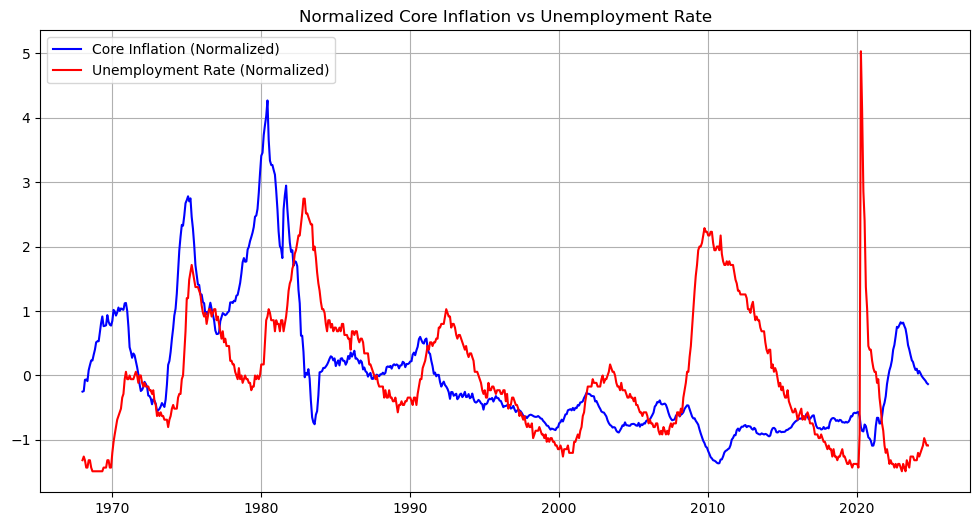

In [46]:
import matplotlib.pyplot as plt

# Convert DATE to index for plotting
# df.set_index('DATE', inplace=True)

# Normalize both columns
df['CORESTICKM159SFRBATL_normalized'] = (
    df['CORESTICKM159SFRBATL'] - df['CORESTICKM159SFRBATL'].mean()
) / df['CORESTICKM159SFRBATL'].std()
df['UNRATE_normalized'] = (
    df['UNRATE'] - df['UNRATE'].mean()
) / df['UNRATE'].std()

# Plot normalized values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CORESTICKM159SFRBATL_normalized'], label='Core Inflation (Normalized)', color='blue')
plt.plot(df.index, df['UNRATE_normalized'], label='Unemployment Rate (Normalized)', color='red')
plt.title('Normalized Core Inflation vs Unemployment Rate')
plt.legend()
plt.grid()
plt.show()




In [ ]:
#https://fred.stlouisfed.org/series/NJSTHPI#0